In [1]:
from google.colab import drive
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root_path = 'drive/My Drive/Machine Learning/Vectoriztion_Logistic_Regression/'

In [4]:

X = np.ndfromtxt(root_path+ 'images.csv', delimiter=',')
y_orig = np.ndfromtxt(root_path+"labels.csv", delimiter=',', dtype=np.int8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: np.ndfromtxt is a deprecated alias of np.genfromtxt, prefer the latter.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: np.ndfromtxt is a deprecated alias of np.genfromtxt, prefer the latter.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
print(X.shape, y_orig.shape)

(10000, 784) (10000,)


In [9]:
yy = []
for i in range(len(y_orig)):
  if(y_orig[i] not in yy):
    yy.append(y_orig[i])


In [10]:
img_size = X.shape[1]
num_class = len(yy)
print(img_size, num_class)

784 10


In [15]:
y = np.zeros([len(y_orig), num_class])
print(y.shape)

(10000, 10)


In [19]:
y[np.arange(len(y_orig)), y_orig] = 1
num_train = int(len(y) * 0.8)
print(num_train)

8000


In [21]:
X_train = X[0:num_train, :]
X_test = X[num_train:-1, :]
y_train = y[0: num_train, :]
y_test = y[num_train:-1, :]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000, 784) (1999, 784)
(8000, 10) (1999, 10)


In [48]:
image1 = plt.imread(root_path + "softmax_activation_1.PNG")
image2 = plt.imread(root_path + "softmax_activation_2.PNG")

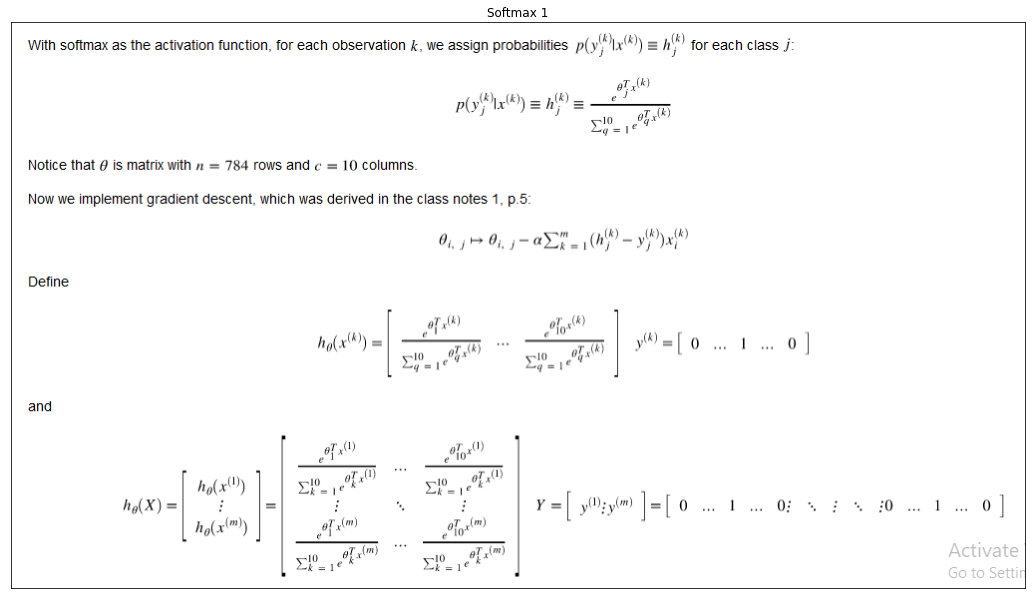

In [54]:
plt.figure(figsize=(40,20))
plt.subplot(121)
plt.imshow(image1)
plt.title("Softmax 1")
plt.xticks([])
plt.yticks([])
plt.show()

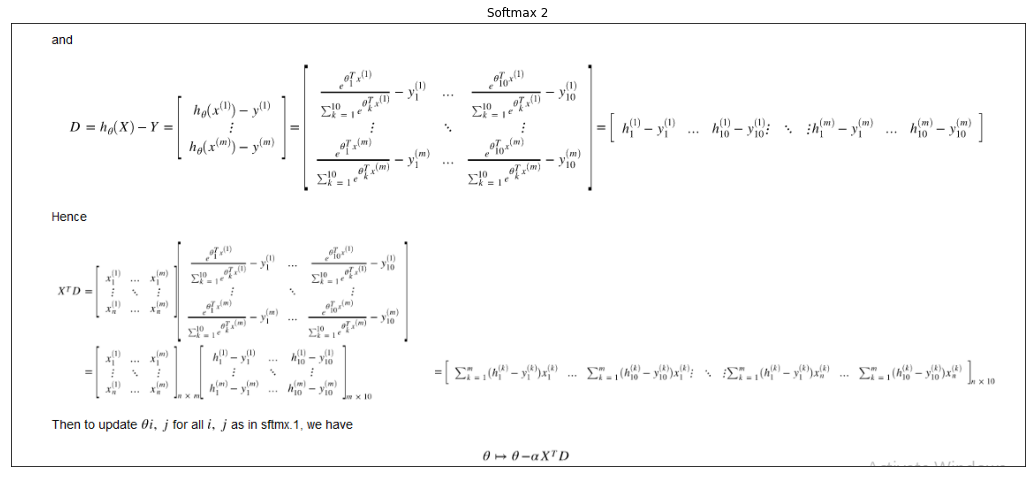

In [55]:
plt.figure(figsize=(40,20))
plt.subplot(121)
plt.imshow(image2)
plt.title("Softmax 2")
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
def h_vec(theta, X):
  signal = np.matmul(X, theta)
  temp = np.exp(signal)
  H = temp / np.sum(temp, axis=1)[:, None]
  return H

In [39]:
# not fully vectorized

def get_theta_not_vectorized(theta, X_train, y_train, alpha):
  H = h_vec(theta, X_train)
  diff = H - y_train
  for i in range(num_class):
    diffT = diff[:, i]
    w = np.matmul(X_train.T, diffT)
    theta[:, i] = theta[:, i] - (w * alpha)
  return theta

def train_not_vectorized(X_train, y_train, max_itr=10, alpha=0.01):
  theta = np.zeros([img_size, num_class])
  for i in range(max_itr):
    theta = get_theta_not_vectorized(theta, X_train, y_train, alpha)
  return theta


In [40]:
start = time.time()
theta = train_not_vectorized(X_train, y_train)
end = time.time()
print("time elapsed: {} seconds   theta={}".format(end - start, theta.shape))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


time elapsed: 0.6036896705627441 seconds   theta=(784, 10)


In [43]:
# not fully vectorized

def get_theta_fully_vectorized(theta, X_train, y_train, alpha):
  H = h_vec(theta, X_train)
  diff = H - y_train
  temp = np.matmul(X_train.T, diff)
  new_theta = theta - (alpha * temp)
  return new_theta

def train_fully_vectorized(X_train, y_train, max_itr=10, alpha=0.01):
  theta = np.zeros([img_size, num_class])
  for i in range(max_itr):
    theta = get_theta_not_vectorized(theta, X_train, y_train, alpha)
  return theta


In [44]:
start = time.time()
theta = train_fully_vectorized(X_train, y_train)
end = time.time()
print("time elapsed: {} seconds   theta={}".format(end - start, theta.shape))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


time elapsed: 0.5726242065429688 seconds   theta=(784, 10)
